In [1]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model, Model, Sequential


In [12]:
try : 
  cnn = load_model('/content/cifar10_accuracy_82v1.h5')
  cnn.summary()

except Exception as err:
  print(str(err))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_11 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

In [5]:
import cv2 

src_img1 = cv2.imread('/content/cat(1).jpg', cv2.IMREAD_COLOR)
src_img2 = cv2.imread('/content/deer(1).jpg', cv2.IMREAD_COLOR)
src_img3 = cv2.imread('/content/truck(1).jpg', cv2.IMREAD_COLOR)

dst_img1 = cv2.cvtColor(src_img1, cv2.COLOR_BGR2RGB)
dst_img2 = cv2.cvtColor(src_img2, cv2.COLOR_BGR2RGB)
dst_img3 = cv2.cvtColor(src_img3, cv2.COLOR_BGR2RGB)

In [16]:
type(dst_img1), type(src_img1)

(numpy.ndarray, numpy.ndarray)

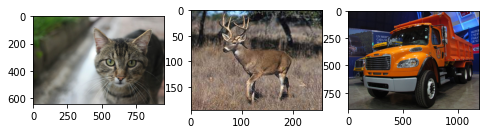

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

plt.subplot(1, 3, 1)
plt.imshow(dst_img1)
plt.subplot(1, 3, 2)
plt.imshow(dst_img2)
plt.subplot(1, 3, 3)
plt.imshow(dst_img3)


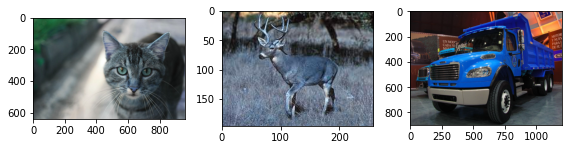

In [30]:
plt.figure(figsize = (8, 8))

plt.subplot(1, 3, 1)
plt.imshow(src_img1)
plt.subplot(1, 3, 2)
plt.imshow(src_img2)
plt.subplot(1, 3, 3)
plt.imshow(src_img3)

plt.tight_layout()
plt.show()

In [17]:
dst_img1 = cv2.resize(dst_img1, (32, 32))
dst_img2 = cv2.resize(dst_img2, (32, 32))
dst_img3 = cv2.resize(dst_img3, (32, 32))

In [18]:
src_img1 = src_img1 / 255.0
dst_img1 = dst_img1 / 255.0

src_img2 = src_img2 / 255.0
dst_img2 = dst_img2 / 255.0

src_img3 = src_img3 / 255.0
dst_img3 = dst_img3 / 255.0

print(src_img1.shape, dst_img1.shape)
print(src_img2.shape, dst_img2.shape)
print(src_img3.shape, dst_img3.shape)

(640, 960, 3) (32, 32, 3)
(196, 258, 3) (32, 32, 3)
(900, 1200, 3) (32, 32, 3)


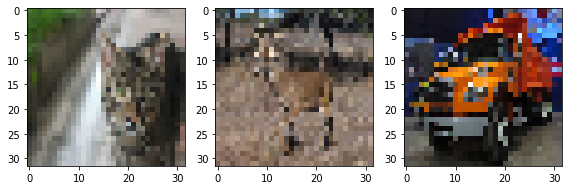

In [20]:
plt.figure(figsize=(8,8))

plt.subplot(1,3,1)
plt.imshow(dst_img1)
plt.subplot(1,3,2)
plt.imshow(dst_img2)
plt.subplot(1,3,3)
plt.imshow(dst_img3)


plt.tight_layout()
plt.show()

In [21]:
test_image_list = []

test_image_list.append(dst_img1)
test_image_list.append(dst_img2)
test_image_list.append(dst_img3)

test_image_array = np.array(test_image_list)

In [23]:
print(test_image_array.shape)

(3, 32, 32, 3)


In [24]:
class_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(len(class_name))

10


In [25]:
pred = cnn.predict(test_image_array)

print(pred.shape)

(3, 10)


In [26]:
for index in range(len(pred)):

  class_index = np.argmax(pred[index])
  print('prediction => ', class_name[class_index], pred[index].max())

prediction =>  cat 0.89465404
prediction =>  frog 0.85905445
prediction =>  truck 0.5589308


In [29]:
top3 = 3

for index in range(len(pred)):

  sorted_index = pred[index].argsort()
  sorted_index = sorted_index[::-1]

  print('='*30)
  print(sorted_index)

  for j in range(top3):
    pred_val = pred[index, sorted_index[j]]
    class_index = sorted_index[j]
    print('prediction => ', class_name[class_index], pred_val)

[3 2 6 5 4 7 0 8 9 1]
prediction =>  cat 0.89465404
prediction =>  bird 0.053712882
prediction =>  frog 0.027285874
[6 4 3 2 5 7 9 0 1 8]
prediction =>  frog 0.85905445
prediction =>  deer 0.11379477
prediction =>  cat 0.020658273
[9 1 0 8 6 3 2 7 5 4]
prediction =>  truck 0.5589308
prediction =>  automobile 0.44106916
prediction =>  airplane 3.0650675e-08
